# Models

In [1]:
#get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Libraries
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers

# load numpy array from csv file
from numpy import loadtxt

#plotting performance
import matplotlib.pyplot as plt

## Load prepared dataset

In [3]:
# load array
X = loadtxt('/content/drive/MyDrive/data/X.csv', delimiter=',')
y = loadtxt('/content/drive/MyDrive/data/y.csv', delimiter=',')

# print the array
print(X)
print(y)

[[2.5500e+02 1.2175e+04 4.5290e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.5500e+02 4.6240e+03 2.0400e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0710e+03 2.2600e+02 3.8400e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [4.8200e+02 1.5190e+03 2.3740e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0380e+04 4.2600e+02 3.6280e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 5.5100e+02 5.6530e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split sample into 80% training, 10% test & 10% validation datasets
Next, 10% of the data was split off for testting, 10% for validation and the remaining 80% was used as for training data.

In [4]:
from sklearn.model_selection import train_test_split

#first split data for training and test data (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (11977, 255)
Training labels shape: (11977, 76)
Validation data shape: (1497, 255)
Validation labels shape: (11977, 76)
Test data shape: (1498, 255)
Test labels shape: (1498, 76)


In [5]:
max_words = 14953

In [6]:
seq_len = 255

## Simple RNN Model
Input will be passed to an basic RNN layer - sequences will be generated 

In [7]:
RNN_model = tf.keras.Sequential()

In [8]:
RNN_model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=82,
                           input_length=seq_len))

In [9]:
RNN_model.add(layers.SimpleRNN(seq_len))#embedding dimension

In [10]:
RNN_model.add(layers.Dense(y.shape[1], activation='softmax'))

In [11]:
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [12]:
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 255, 82)           1226146   
                                                                 
 simple_rnn (SimpleRNN)      (None, 255)               86190     
                                                                 
 dense (Dense)               (None, 76)                19456     
                                                                 
Total params: 1,331,792
Trainable params: 1,331,792
Non-trainable params: 0
_________________________________________________________________


In [13]:
RNN_history = RNN_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32)

Epoch 1/50
375/375 [==============================] - 147s 379ms/step - loss: 3.3724 - accuracy: 0.0821 - val_loss: 3.3570 - val_accuracy: 0.0708
Epoch 2/50
375/375 [==============================] - 136s 363ms/step - loss: 3.3351 - accuracy: 0.0857 - val_loss: 3.3177 - val_accuracy: 0.0955
Epoch 3/50
375/375 [==============================] - 136s 363ms/step - loss: 3.3360 - accuracy: 0.0883 - val_loss: 3.3384 - val_accuracy: 0.0955
Epoch 4/50
375/375 [==============================] - 135s 360ms/step - loss: 3.3305 - accuracy: 0.0873 - val_loss: 3.3585 - val_accuracy: 0.0955
Epoch 5/50
375/375 [==============================] - 135s 361ms/step - loss: 3.3257 - accuracy: 0.0873 - val_loss: 3.3363 - val_accuracy: 0.0708
Epoch 6/50
375/375 [==============================] - 136s 363ms/step - loss: 3.3250 - accuracy: 0.0894 - val_loss: 3.3456 - val_accuracy: 0.0762
Epoch 7/50
375/375 [==============================] - 135s 359ms/step - loss: 3.3270 - accuracy: 0.0894 - val_loss: 3.3437 -

In [14]:
loss_and_metrics = RNN_model.evaluate(X_test, y_test, verbose=2)
print("RNN Test Loss", loss_and_metrics[0])
print("RNN Test Accuracy", loss_and_metrics[1])

47/47 - 4s - loss: 3.3074 - accuracy: 0.1121 - 4s/epoch - 90ms/step
RNN Test Loss 3.3073720932006836
RNN Test Accuracy 0.11214952915906906


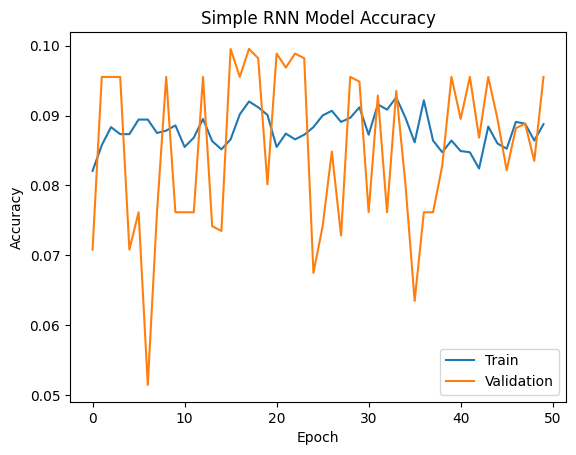

In [15]:
# Plot training & validation accuracy values
plt.plot(RNN_history.history['accuracy'])
plt.plot(RNN_history.history['val_accuracy'])
plt.title('Simple RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

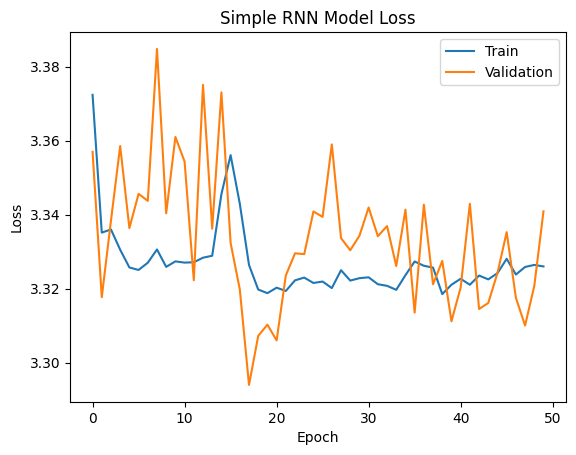

In [16]:
# Plot training & validation loss values
plt.plot(RNN_history.history['loss'])
plt.plot(RNN_history.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Single LSTM Model

In [17]:
LSTM_model = tf.keras.Sequential()

In [18]:
LSTM_model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=82,
                           input_length=seq_len))

In [19]:
LSTM_model.add(layers.LSTM(82))

In [20]:
LSTM_model.add(layers.Dense(y.shape[1], activation='softmax'))

In [21]:
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [22]:
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 255, 82)           1226146   
                                                                 
 lstm (LSTM)                 (None, 82)                54120     
                                                                 
 dense_1 (Dense)             (None, 76)                6308      
                                                                 
Total params: 1,286,574
Trainable params: 1,286,574
Non-trainable params: 0
_________________________________________________________________


In [23]:
LSTM_history = LSTM_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=5)

Epoch 1/50
375/375 [==============================] - 97s 251ms/step - loss: 3.3489 - accuracy: 0.0913 - val_loss: 3.2880 - val_accuracy: 0.0762
Epoch 2/50
375/375 [==============================] - 94s 251ms/step - loss: 3.2838 - accuracy: 0.0935 - val_loss: 3.2756 - val_accuracy: 0.0955
Epoch 3/50
375/375 [==============================] - 96s 256ms/step - loss: 3.2793 - accuracy: 0.0938 - val_loss: 3.2838 - val_accuracy: 0.0955
Epoch 4/50
375/375 [==============================] - 97s 258ms/step - loss: 3.2787 - accuracy: 0.0952 - val_loss: 3.2809 - val_accuracy: 0.0955
Epoch 5/50
375/375 [==============================] - 96s 256ms/step - loss: 3.2780 - accuracy: 0.0966 - val_loss: 3.2849 - val_accuracy: 0.0955
Epoch 6/50
375/375 [==============================] - 94s 252ms/step - loss: 3.2777 - accuracy: 0.0929 - val_loss: 3.2845 - val_accuracy: 0.0955
Epoch 7/50
375/375 [==============================] - 97s 259ms/step - loss: 3.2768 - accuracy: 0.0968 - val_loss: 3.2842 - val_ac

In [1]:

loss_and_metrics = LSTM_history.evaluate(X_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

NameError: ignored

In [ ]:
# Plot training & validation accuracy values
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title('Simple Single LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title('Single LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Multi-layer LSTM Model

In [ ]:
multi_LSTM_model = tf.keras.Sequential()

In [ ]:
multi_LSTM_model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=82,
                           input_length=seq_len))

In [ ]:
multi_LSTM_model.add(layers.LSTM(82, return_sequences=True))

In [ ]:
multi_LSTM_model.add(layers.LSTM(82))

In [ ]:
multi_LSTM_model.add(layers.Dense(y.shape[1], activation='softmax'))

In [ ]:
multi_LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
multi_LSTM_model.summary()

In [ ]:
multi_LSTM_history = multi_LSTM_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50)

In [ ]:
loss_and_metrics = multi_LSTM_history.evaluate(X_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
# Plot training & validation accuracy values
plt.plot(multi_LSTM_history.history['accuracy'])
plt.plot(multi_LSTM_history.history['val_accuracy'])
plt.title('Multi LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(multi_LSTM_history.history['loss'])
plt.plot(multi_LSTM_history.history['val_loss'])
plt.title('Multi LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## CNN Model

In [ ]:
CNN_model = tf.keras.Sequential()

In [ ]:
CNN_model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=82,
                           input_length=seq_len))

In [ ]:
CNN_model.add(layers.Conv1D(128, 5, activation='relu'))

In [ ]:
CNN_model.add(layers.GlobalMaxPooling1D())

In [ ]:
CNN_model.add(layers.Dense(10, activation='relu'))

In [ ]:
CNN_model.add(layers.Dense(y.shape[1], activation='softmax'))

In [ ]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
CNN_model.summary()

In [ ]:
CNN_history = CNN_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

In [ ]:
loss_and_metrics = CNN_history.evaluate(X_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
# Plot training & validation accuracy values
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Random Forest  Model

In [ ]:
#!pip install tensorflow-decision-forests

In [ ]:
#import tensorflow_decision_forests as tfdf #Random Forest Model

In [ ]:
#random_forest_model = tfdf.keras.RandomForestModel()

In [ ]:
#random_forest_model.compile(metrics=["accuracy"])

In [ ]:
#print(y_train)

In [ ]:
#y_train = np.argmax(y_train, axis=1)
#print(y_train)

In [ ]:
#y_val = np.argmax(y_val, axis=1)
#y_test = np.argmax(y_test, axis=1)

In [ ]:
#random_forest_model.fit(X_train, y_train, validation_data=(X_val, y_val))

In [ ]:
#random_forest_model.evaluate(X_test, y_test)

## Part 1 News Article Section Prediction Task Checklist

Compare LSTM and Basic RNN models

Compare a single layer LSTM implementation to multi-layer LSTM implementations

Compare Embeddings learned on the fly to pre-trained word embedding available from the Tensorflow Hub or HuggingFace.

Compare embeddings based approaches to a more traditional text encoding approach.

Use of CNNs with multiple and heterogeneous kernel sizes as an alternative to an LSTM solution

Use of CNNs with multiple and heterogeneous kernel sizes as an additional
layer before a LSTM solution

Compare the performance of one of your best performing neural models against the non-neural method (e.g Random Forests).

build a version of a model that uses both the text of an article and the web title to predict the section heading

Save best model based on non pre-trained embeddings

Save best model based on pre-trained embeddings

A link to these best performing models should be included in your submission report and a
demonstration notebook (described later) should be capable of loading these from the web as
well as your snapshot of test data, and demonstrating your test results with these models. You
will also be using these saved models in Parts 2 below for training.

## Part 2 Transfer Learning Checklist

https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category

create a new model based on predicting the topic based on the article text

Build and evaluate models based on your best 2 models obtained from part 1 using a Transfer Learning method, but also build models from scratch

The models you build should allow some
amount of like to like comparison between the newly created models and the models imported
from Part A, and should where appropriate demonstrate approaches to Transfer Learning and
good practice in model design.

Save the best performing resulting Transfer Learning and ‘From Scratch’ models for this
dataset. Links to these models need to be supplied as part of your submission.

Your evaluation of the models should be based minimally on training and validation error and any other metrics
or methods you think appropriate. Again, the demo notebook should be capable of downloading
the models and your test data and automatically demonstrating the calculation of test value
results.

## Part 3 Writing your own news article

write a few sentences of a news article for the two most frequent genre / section types in your dataset.

build a generative model based on this dataset that outputs script excerpts that
are 10 turns

core model should be based on the use of LSTMs, but beyond this you are free to explore
whatever architecture and hyper-parameter variants that you find results in the best
performance in the language generation task

Report model performance in terms of perplexity and any other metrics or methods you finappropriate.

report of quality that is worthy for submission for publication at a national conference